In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

house_df = pd.read_csv('kc_house_data.csv')
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Exercise 1
a) Create and train simple regression model of sqft_living to price.  
b) Evaluate and visualise created model.  
c) Create and plot higher order polynomial regression models.

In [30]:
#a)

X = house_df.sqft_living.values.reshape(-1,1)[:1000]
y = house_df.price.values.reshape(-1)[:1000]

model = LinearRegression() 
#Your code:
model.fit(X, y)

#Hint: .fit()

LinearRegression()

Method `fit()` fits here linear model.

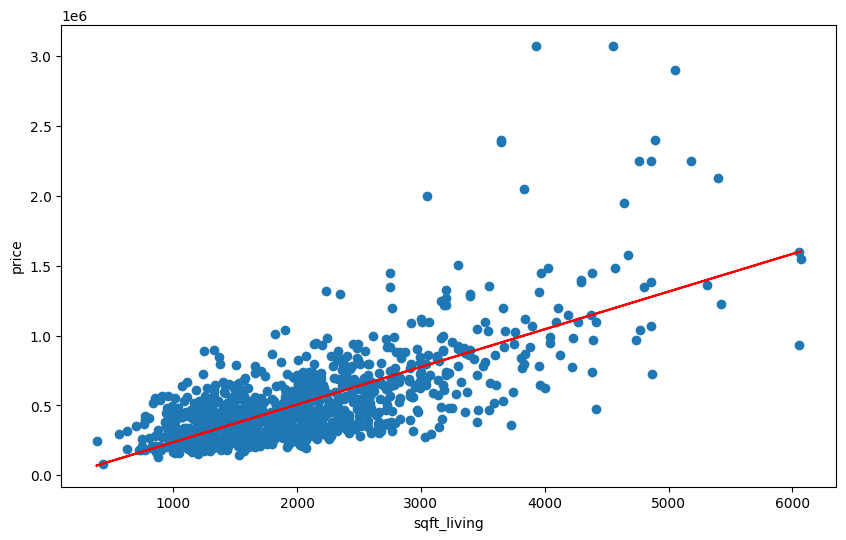

In [31]:
#b)

#Your code:
pred = model.predict(X)
plt.figure(figsize=(10,6))
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.scatter(X, y)
plt.plot(X, pred, c='red')
#Hint: model.predict(), model.intercept_,  model.coef_, model.score()

Method used here on `model` object allows us to predict house price depending on given `sqft_living` values.

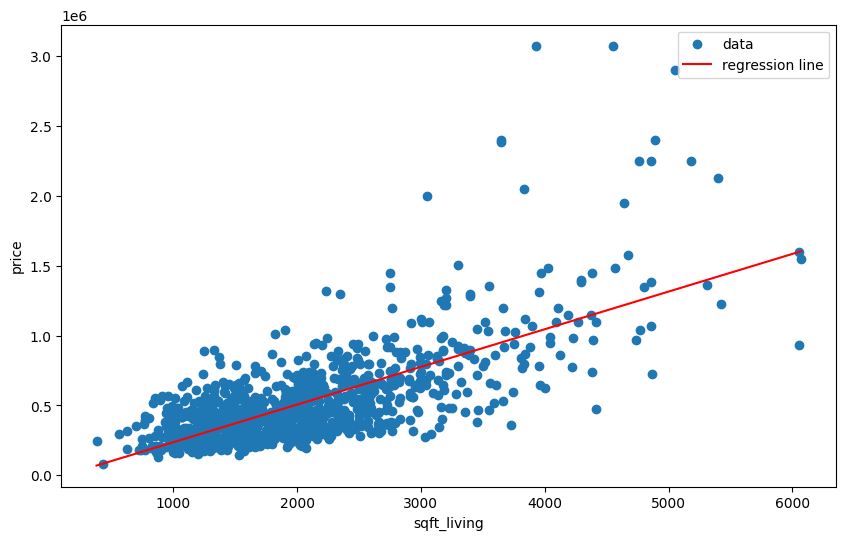

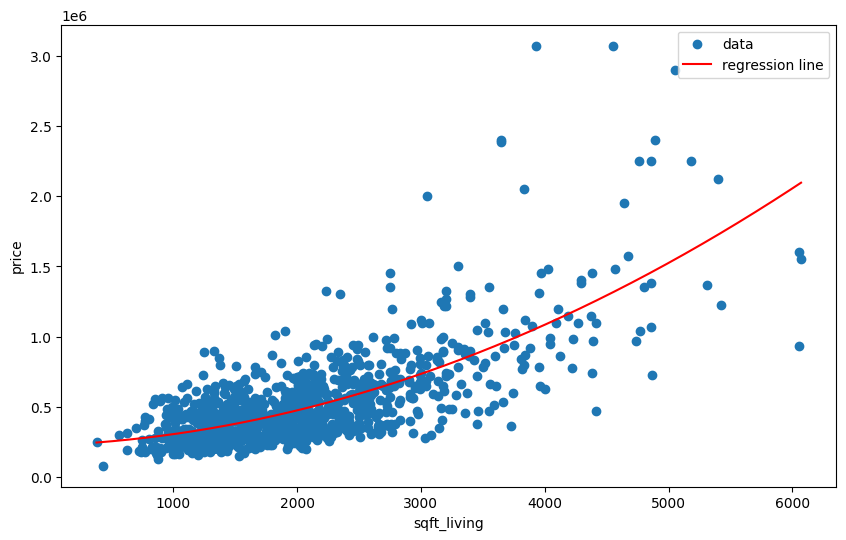

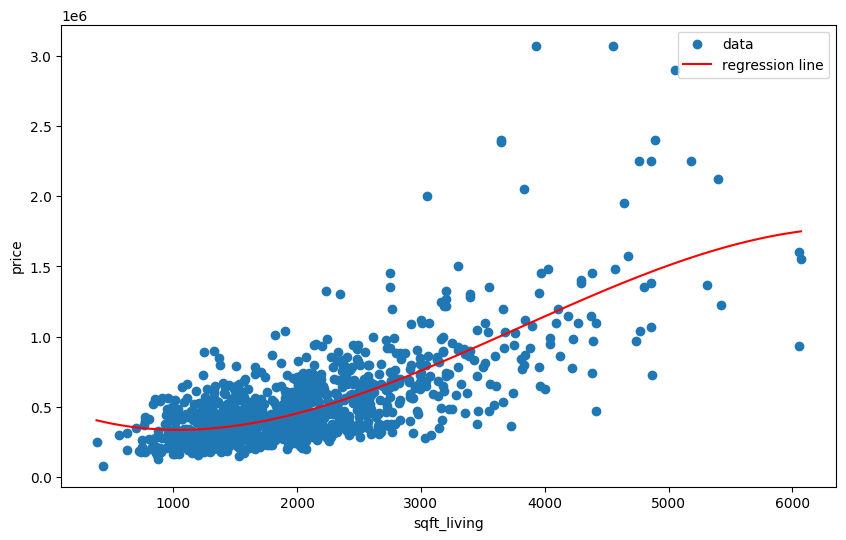

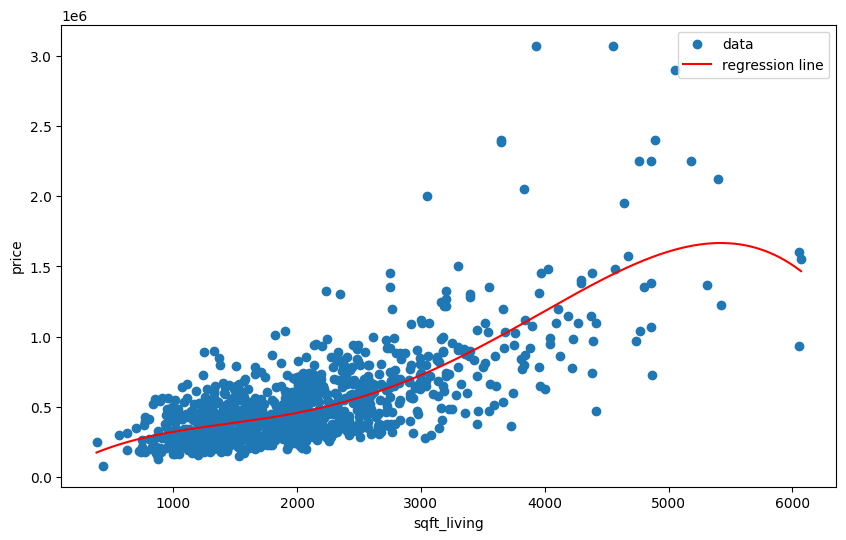

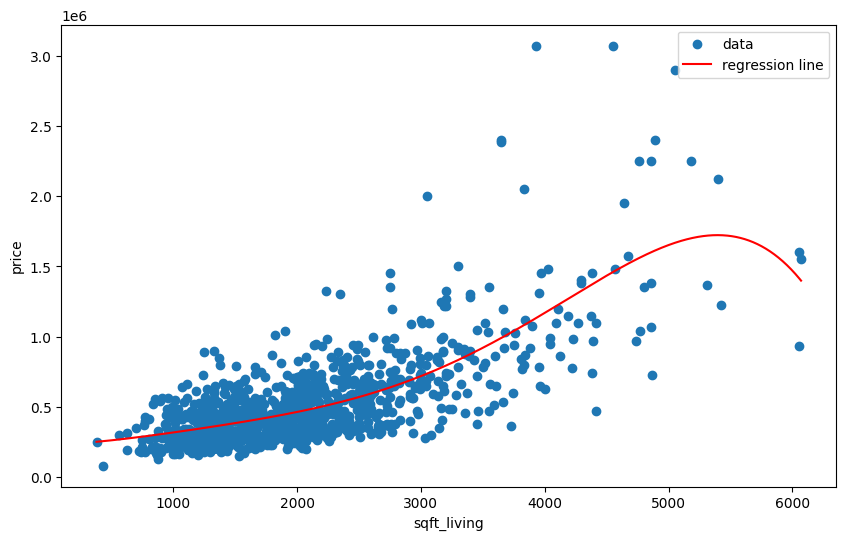

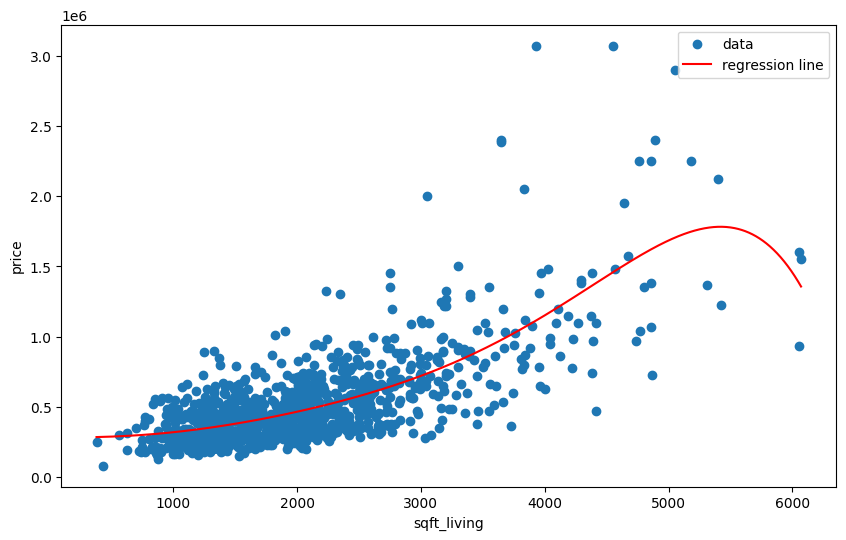

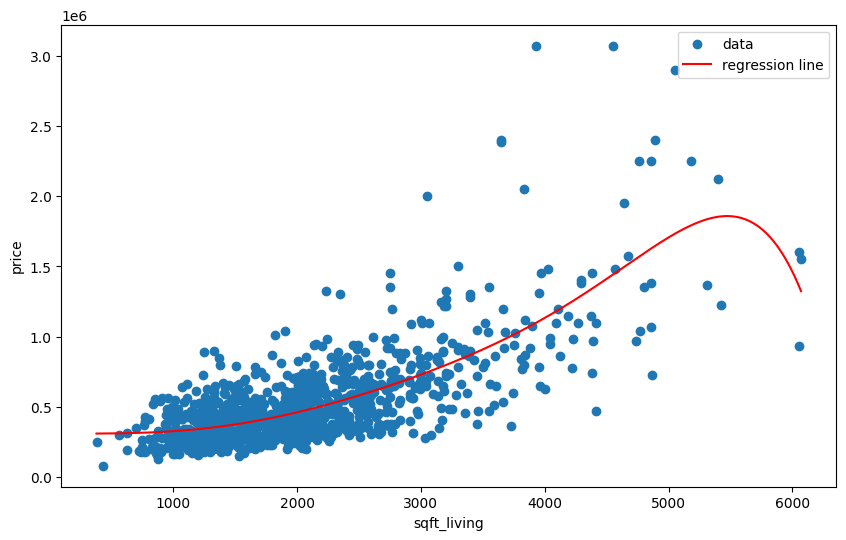

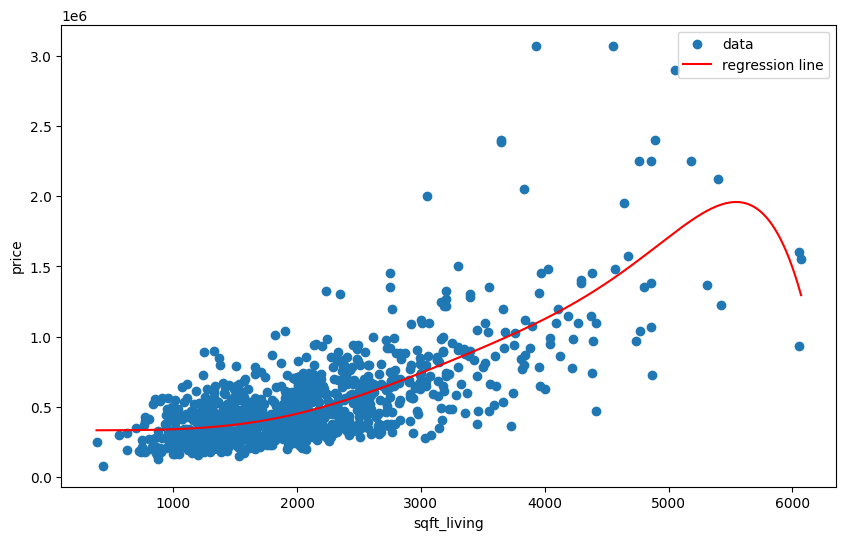

In [32]:
#c)
for order in range(1,9):
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)
    
    #Your code:
    plt.figure(figsize=(10,6))
    pol_reg = LinearRegression()
    pol_reg.fit(X_order, y)

    df = pd.DataFrame({'X': X.reshape(-1), 'y': pol_reg.predict(X_order)})
    df = df.sort_values(by='X', axis=0, ascending=True)

    poly_fit = np.polyfit(df['X'], df['y'], deg=order)
    p1d = np.poly1d(poly_fit)
    X_temp = np.linspace(X.flatten().min(), X.flatten().max(), len(X.flatten()))

    plt.xlabel('sqft_living')
    plt.ylabel('price')
    plt.scatter(X, y, label='data')
    plt.plot(X_temp, p1d(X_temp), color='red', label='regression line')
    plt.legend()

plt.show()


Firstly I predicted prices with appropriate (different degrees) polynomial regression. However we can notice that there is small amount of `X` data at its end (range from 5000 to 6000), so there will be less generated prices. Then if we want to draw line from one predicted point to another we will receive sharp egde at the end of plot. To prevent this I used `polyfit()` and `poly1d()` methods to create the line that will fit predicted points with appropriate polynomial.

## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models. 

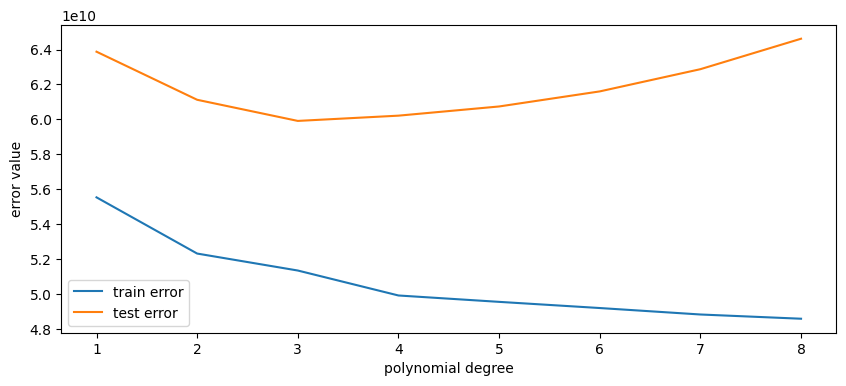

In [33]:
#a)
train_err = []
test_err = []

model = LinearRegression()

for order in range(1,9):
    poly = PolynomialFeatures(degree=order, include_bias=False)
    X_order = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=0.3, random_state=44)

    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_err.append(mean_squared_error(y_train, pred_train))
    test_err.append(mean_squared_error(y_test, pred_test))

x = np.arange(1, 9)
plt.figure(figsize=(10,4))

plt.xlabel('polynomial degree')
plt.ylabel('error value')
plt.plot(x, train_err, label='train error')
plt.plot(x, test_err, label='test error')
plt.legend()
plt.show()



As we can see train error is getting smaller with polynomial degree increase what we cannot say about test error. It is getting smaller from 1 to 3 polynomial degree and then it is growing. Additionally train error is much smaller than test error.

## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

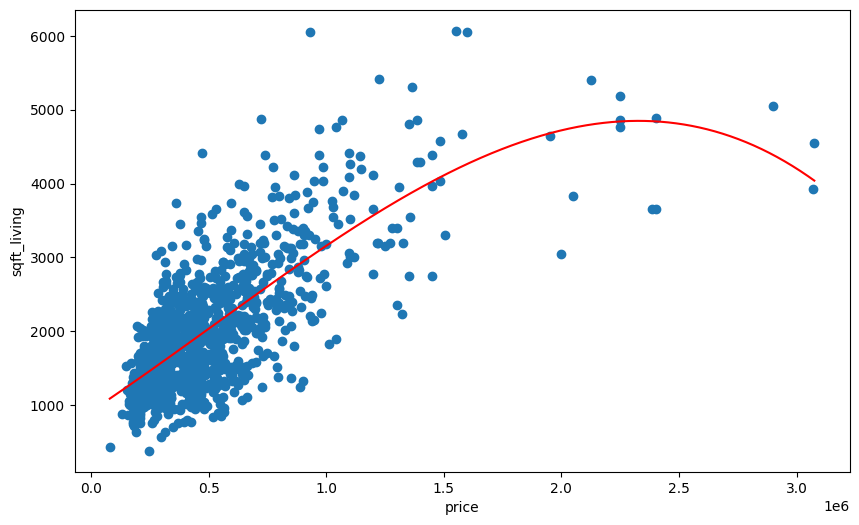

In [34]:
#a)

X = house_df.price.values.reshape(-1,1)[:1000]
y = house_df.sqft_living.values.reshape(-1)[:1000]

#Your code:
poly = PolynomialFeatures(degree=3, include_bias=False)
X_transformed = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_transformed, y)

df = pd.DataFrame({'X': X.reshape(-1), 'y': model.predict(X_transformed)})
df = df.sort_values(by='X', axis=0, ascending=True)
poly_fit = np.polyfit(df['X'], df['y'], deg=order)
p1d = np.poly1d(poly_fit)
X_temp = np.linspace(X.flatten().min(), X.flatten().max(), len(X.flatten()))

plt.figure(figsize=(10,6))
plt.xlabel('price')
plt.ylabel('sqft_living')
plt.scatter(X, y)


plt.plot(X_temp, p1d(X_temp), color='red')

In [35]:
#b) Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions up to third degree

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))


#Your model:
# added only 'sqft_above' and 'yr_built' to X data frame, rest the same
X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view', 'sqft_above', 'yr_built']].values.reshape(-1,6)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))


Mean squared error equals: 48749274646.11548
Mean squared error equals: 42047667728.11808


Here I added only 2 features to `X` data frame: `sqft_above` and `yr_build`. They seems to have small standard deviation, so it is a good sign to decrease mean squared error.